In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from scraping import Dbase
import numpy as np
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

In [2]:
data = Dbase()
df1 = data.imdb_requests()

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   titles         250 non-null    object 
 1   genre1         250 non-null    object 
 2   genre2         250 non-null    object 
 3   genre3         250 non-null    object 
 4   nb_genres      250 non-null    int64  
 5   released_year  250 non-null    int64  
 6   director1      250 non-null    object 
 7   director2      250 non-null    object 
 8   director3      250 non-null    object 
 9   nb_directors   250 non-null    int64  
 10  grade          250 non-null    float64
 11  votes          250 non-null    int64  
 12  gross(M$)      250 non-null    float64
dtypes: float64(2), int64(4), object(7)
memory usage: 25.5+ KB


# Objectif : Prédiction de la note

In [4]:
#!pip install pandas_profiling


In [5]:
df1

,titles,genre1,genre2,genre3,nb_genres,released_year,director1,director2,director3,nb_directors,grade,votes,gross(M$)
0,Les Évadés,Drama,Drama,Drama,1,1994,Frank Darabont,Frank Darabont,Frank Darabont,1,9.3,2384498,28.34
1,Le parrain,Crime,Drama,Drama,2,1972,Francis Ford Coppola,Francis Ford Coppola,Francis Ford Coppola,1,9.2,1652566,134.97
2,The Dark Knight : Le Chevalier noir,Action,Crime,Drama,3,2008,Christopher Nolan,Christopher Nolan,Christopher Nolan,1,9.0,2347962,534.86
3,"Le parrain, 2ème partie",Crime,Drama,Drama,2,1974,Francis Ford Coppola,Francis Ford Coppola,Francis Ford Coppola,1,9.0,1149888,57.30
4,12 Hommes en colère,Crime,Drama,Drama,2,1957,Sidney Lumet,Sidney Lumet,Sidney Lumet,1,9.0,704057,4.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,Mr. Smith au sénat,Comedy,Drama,Drama,2,1939,Frank Capra,Frank Capra,Frank Capra,1,8.1,108451,9.60
246,Autant en emporte le vent,Drama,History,Romance,3,1939,Victor Fleming,George Cukor,Sam Wood,3,8.1,293981,198.68
247,New York - Miami,Comedy,Romance,Romance,2,1934,Frank Capra,Frank Capra,Frank Capra,1,8.1,95754,4.36
248,La passion de Jeanne d'Arc,Biography,Drama,History,3,1928,Carl Theodor Dreyer,Carl Theodor Dreyer,Carl Theodor Dreyer,1,8.1,48981,0.02


## Observation

In [15]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df1.sample(n=250))
prof.to_file(output_file='output.html')

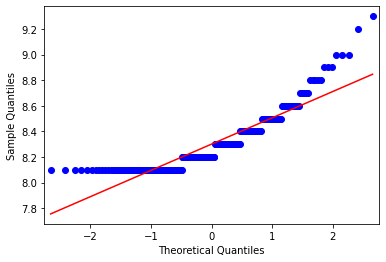

In [53]:
import statsmodels.api as sm

sm.qqplot(df1['grade'], line = 'r')
plt.show()

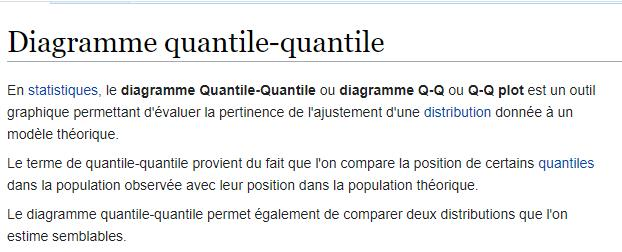

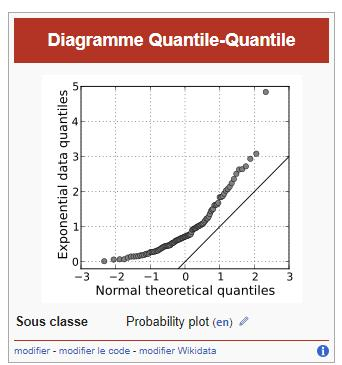

## Numerical variables

In [35]:
df2 = pd.DataFrame()
df2['pearson'] = abs(df1.corr(method = 'pearson'))['grade']

In [36]:
df2['spearman'] = abs(df1.corr(method = 'spearman'))['grade']

In [37]:
df2['kendall'] = abs(df1.corr(method = 'kendall'))['grade']

In [38]:
df2

,pearson,spearman,kendall
nb_genres,0.090273,0.057558,0.048996
released_year,0.000955,0.047684,0.034196
nb_directors,0.064041,0.060749,0.053623
grade,1.000000,1.000000,1.000000
votes,0.616186,0.413325,0.307652
gross(M$),0.196697,0.120959,0.087255


* **Par rapport au model prédictif, Seul 'votes' bénéficie d'une corrélation intéressante**

## Categorial variables

In [45]:
df_cat = df1[['genre1','director1']]
df_cat
        

,genre1,director1
0,Drama,Frank Darabont
1,Crime,Francis Ford Coppola
2,Action,Christopher Nolan
3,Crime,Francis Ford Coppola
4,Crime,Sidney Lumet
...,...,...
245,Comedy,Frank Capra
246,Drama,Victor Fleming
247,Comedy,Frank Capra
248,Biography,Carl Theodor Dreyer


In [48]:
#df_cat2 = pd.DataFrame(df1, columns = ['genre1', 'director1'])
#df_cat2

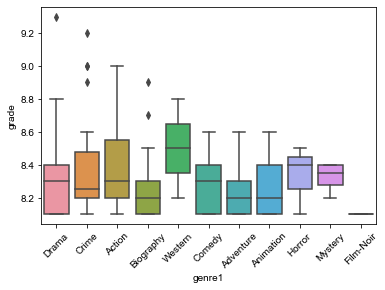

In [54]:
from matplotlib.pyplot import figure
ax = sns.boxplot(x="genre1", y="grade", data=df1)
plt.xticks(rotation=45)
sns.set(rc={'figure.figsize':(30, 10)})

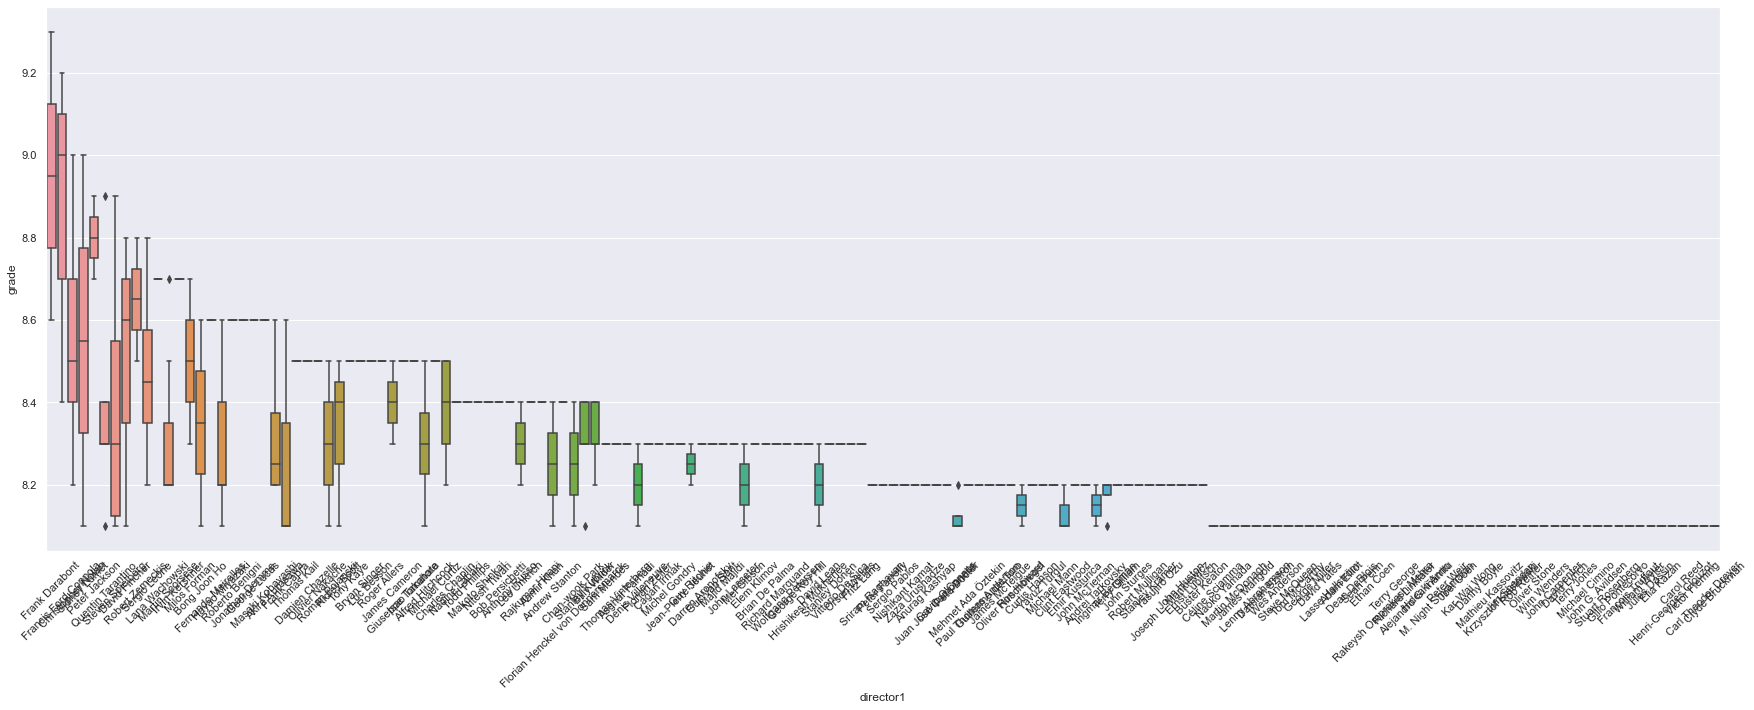

In [56]:
from matplotlib.pyplot import figure
ax = sns.boxplot(x="director1", y="grade", data=df1)
plt.xticks(rotation=45)
sns.set(rc={'figure.figsize':(30, 10)})

In [58]:
df1['director1'].value_counts()

Christopher Nolan    7
Stanley Kubrick      7
Martin Scorsese      7
Alfred Hitchcock     6
Akira Kurosawa       6
                    ..
Wes Anderson         1
Céline Sciamma       1
Masaki Kobayashi     1
Tony Kaye            1
Sriram Raghavan      1
Name: director1, Length: 157, dtype: int64

In [60]:
df1['director1'].nunique()

157

In [64]:
df4 = df1.head(25)

<AxesSubplot:xlabel='director1', ylabel='grade'>

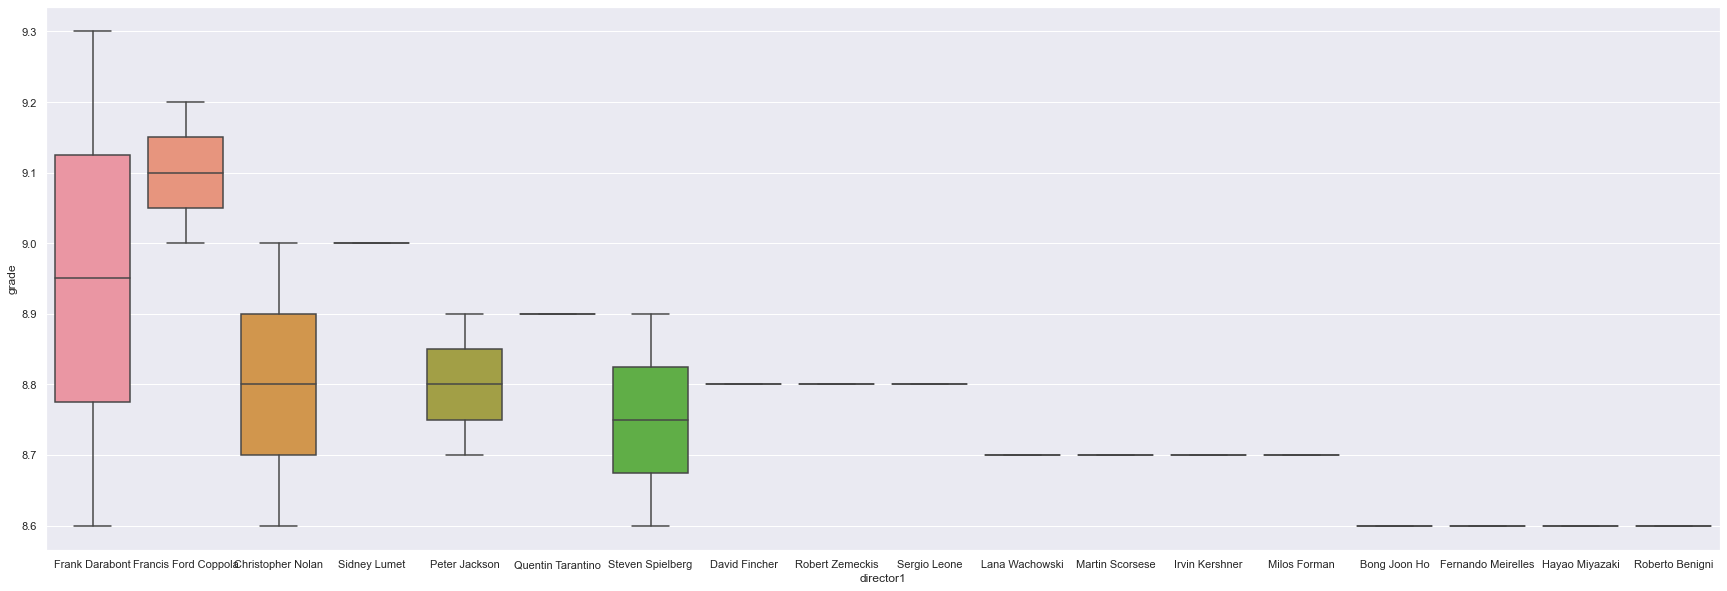

In [66]:
sns.boxplot(x="director1", y="grade", data=df4)

In [69]:
df1[df1['director1']=='Frank Darabont']

,titles,genre1,genre2,genre3,nb_genres,released_year,director1,director2,director3,nb_directors,grade,votes,gross(M$)
0,Les Évadés,Drama,Drama,Drama,1,1994,Frank Darabont,Frank Darabont,Frank Darabont,1,9.3,2384498,28.34
23,La ligne verte,Crime,Drama,Fantasy,3,1999,Frank Darabont,Frank Darabont,Frank Darabont,1,8.6,1169794,136.80


In [129]:
df5 = df1[:100].copy()


In [130]:
df6 = pd.get_dummies(data=df5, columns=['director1','genre1'])

In [131]:
df6

,titles,genre2,genre3,nb_genres,released_year,director2,director3,nb_directors,grade,votes,...,genre1_Action,genre1_Adventure,genre1_Animation,genre1_Biography,genre1_Comedy,genre1_Crime,genre1_Drama,genre1_Horror,genre1_Mystery,genre1_Western
0,Les Évadés,Drama,Drama,1,1994,Frank Darabont,Frank Darabont,1,9.3,2384498,...,0,0,0,0,0,0,1,0,0,0
1,Le parrain,Drama,Drama,2,1972,Francis Ford Coppola,Francis Ford Coppola,1,9.2,1652566,...,0,0,0,0,0,1,0,0,0,0
2,The Dark Knight : Le Chevalier noir,Crime,Drama,3,2008,Christopher Nolan,Christopher Nolan,1,9.0,2347962,...,1,0,0,0,0,0,0,0,0,0
3,"Le parrain, 2ème partie",Drama,Drama,2,1974,Francis Ford Coppola,Francis Ford Coppola,1,9.0,1149888,...,0,0,0,0,0,1,0,0,0,0
4,12 Hommes en colère,Drama,Drama,2,1957,Sidney Lumet,Sidney Lumet,1,9.0,704057,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Braveheart,Drama,History,3,1995,Mel Gibson,Mel Gibson,1,8.3,970962,...,0,0,0,1,0,0,0,0,0,0
96,Reservoir Dogs,Drama,Thriller,3,1992,Quentin Tarantino,Quentin Tarantino,1,8.3,933153,...,0,0,0,0,0,1,0,0,0,0
97,Full Metal Jacket,War,War,2,1987,Stanley Kubrick,Stanley Kubrick,1,8.3,684654,...,0,0,0,0,0,0,1,0,0,0
98,Requiem pour un massacre - Va et regarde,Thriller,War,3,1985,Elem Klimov,Elem Klimov,1,8.3,62166,...,0,0,0,0,0,0,1,0,0,0


In [134]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
scaler = MinMaxScaler()
keepCols = ['votes']
scaled_df = scaler.fit_transform(df6[keepCols])
scaled_df = pd.DataFrame(scaled_df, columns=keepCols)

scaled_df

,votes
0,1.000000
1,0.688296
2,0.984441
3,0.474222
4,0.284358
...,...
95,0.398024
96,0.381922
97,0.276095
98,0.010999


In [135]:
df6['votes'] = scaled_df

# NECESSITE DE SCALER LES DONNES NUMERIQUES

In [136]:
#importer les données Advertising.csv
list_var = df6.drop(['titles','genre2','genre3','nb_genres','released_year','director2','director3','nb_directors','grade','gross(M$)'],axis = 1)
list_var                    
                     
                     

,votes,director1_Aamir Khan,director1_Akira Kurosawa,director1_Alfred Hitchcock,director1_Andrew Stanton,director1_Anthony Russo,director1_Asghar Farhadi,director1_Billy Wilder,director1_Bob Persichetti,director1_Bong Joon Ho,...,genre1_Action,genre1_Adventure,genre1_Animation,genre1_Biography,genre1_Comedy,genre1_Crime,genre1_Drama,genre1_Horror,genre1_Mystery,genre1_Western
0,1.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.688296,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.984441,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0.474222,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.284358,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.398024,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
96,0.381922,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
97,0.276095,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
98,0.010999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [137]:
from sklearn.linear_model import LinearRegression

#créer un objet reg lin
modeleReg=LinearRegression()

y=df6['grade']
X=list_var

modeleReg.fit(X,y)

LinearRegression()

In [138]:
print(f'La constante est égale à : {modeleReg.intercept_}')
print(f'Les coefficients directeurs sont respectivement de : {modeleReg.coef_}')

#calcul du R²
Rcarre = modeleReg.score(X,y)
print(f'le R² est de : {Rcarre}')

RMSE=np.sqrt(((y-modeleReg.predict(X))**2).sum()/len(y))
print(f'La RMSE est de : {RMSE}')

La constante est égale à : -606458205504.1066
Les coefficients directeurs sont respectivement de : [ 1.22351118e+00 -1.40193481e+09 -1.40193481e+09 -1.40193481e+09
 -5.71644659e+11 -1.40193481e+09 -1.40193481e+09 -1.40193481e+09
 -5.71644659e+11 -1.40193481e+09 -1.40193481e+09 -1.40193481e+09
 -1.40193481e+09 -1.40193481e+09 -1.40193481e+09 -1.40193481e+09
 -1.40193481e+09 -1.40193481e+09 -1.40193481e+09 -1.40193481e+09
 -1.40193481e+09 -1.40193481e+09 -1.40193481e+09 -1.40193481e+09
 -1.40193481e+09 -1.40193481e+09 -1.40193481e+09 -1.40193481e+09
 -1.40193481e+09 -5.71644659e+11 -1.40193481e+09 -5.71644659e+11
 -1.40193481e+09 -1.40193481e+09 -5.71644659e+11 -1.40193481e+09
 -1.40193481e+09 -5.71644659e+11 -1.40193481e+09 -1.40193481e+09
 -5.71644659e+11 -1.40193481e+09 -1.40193481e+09 -1.40193481e+09
 -1.40193481e+09 -1.40193481e+09 -1.40193481e+09 -1.40193481e+09
 -1.40193481e+09 -1.40193481e+09 -1.40193481e+09 -1.40193481e+09
 -1.40193481e+09 -1.40193481e+09 -1.40193481e+09 -1.4019

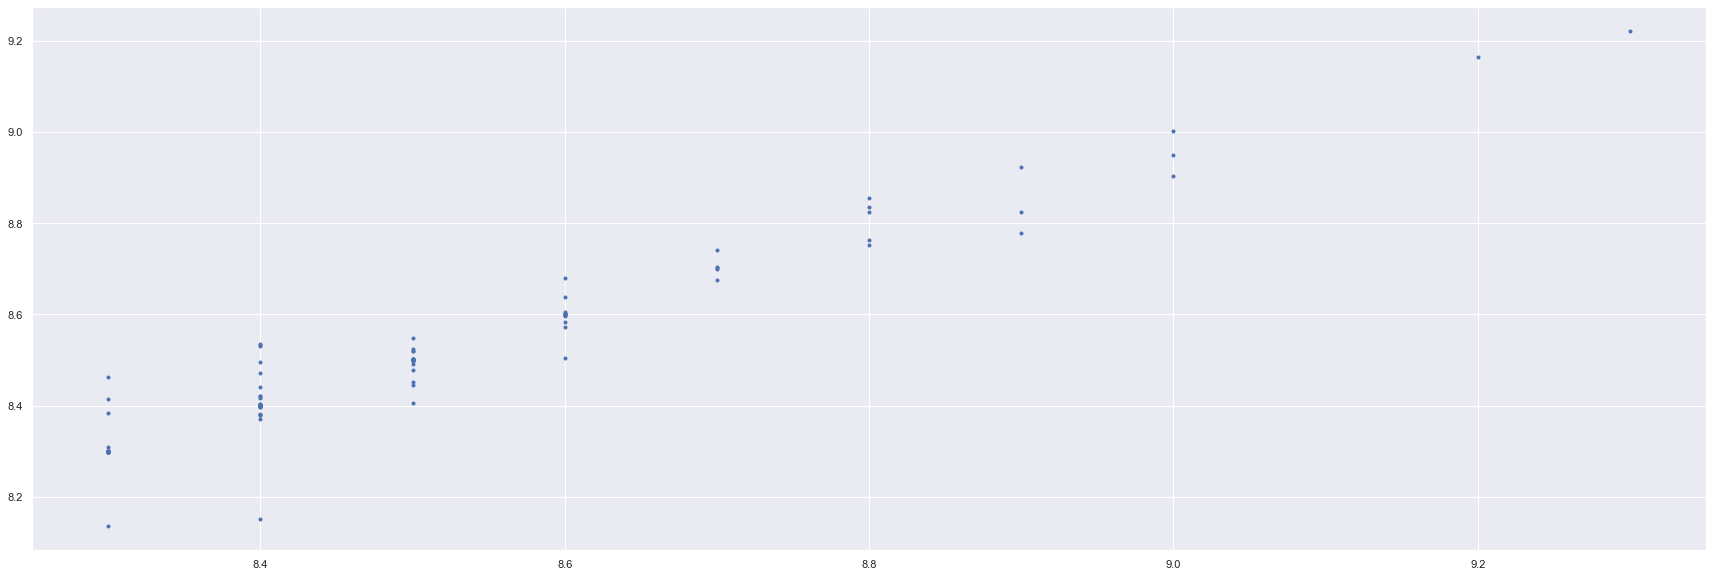

In [139]:
plt.plot(y, modeleReg.predict(X),'.')
plt.show()

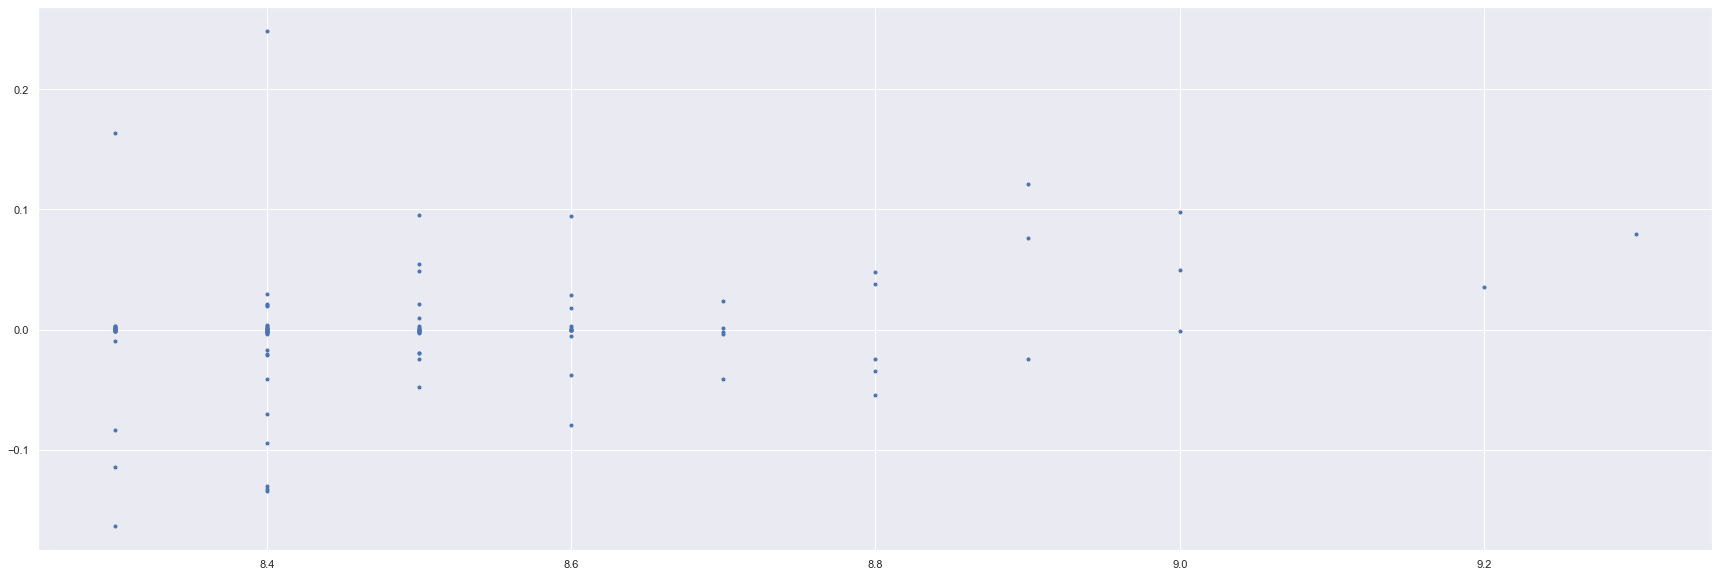

In [140]:
plt.plot(y, y-modeleReg.predict(X),'.')
plt.show()